In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn import tree

In [69]:
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

In [70]:
# Load the diabetes dataset
dataset = load_diabetes()

In [71]:
print("Dataset Overview:")
print(f"Data shape: {dataset.data.shape}")
print(f"Target shape: {dataset.target.shape}")
print(f"Feature names: {dataset.feature_names}")

Dataset Overview:
Data shape: (442, 10)
Target shape: (442,)
Feature names: ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


In [72]:
# Display dataset description
print("Dataset Description:")
print("=" * 50)
print(dataset['DESCR'])

Dataset Description:
.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 featu

##  Data Preprocessing and Feature Engineering

In [73]:
# Create a comprehensive DataFrame with proper feature names
feature_names = ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
df_diabetes = pd.DataFrame(dataset.data, columns=feature_names)

In [74]:
df_diabetes.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [75]:
# Add target variable for complete dataset view
df_diabetes['target'] = dataset.target

print("Dataset Information:")
print(f"Shape: {df_diabetes.shape}")
print(f"Missing values: {df_diabetes.isnull().sum().sum()}")
print("\nFirst 5 rows:")
print(df_diabetes.head())

Dataset Information:
Shape: (442, 11)
Missing values: 0

First 5 rows:
        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  target  
0 -0.002592  0.019907 -0.017646   151.0  
1 -0.039493 -0.068332 -0.092204    75.0  
2 -0.002592  0.002861 -0.025930   141.0  
3  0.034309  0.022688 -0.009362   206.0  
4 -0.002592 -0.031988 -0.046641   135.0  


In [76]:
# Basic statistical summary
print("Statistical Summary:")
print("=" * 50)
print(df_diabetes.describe())

Statistical Summary:
                age           sex           bmi            bp            s1  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean  -2.511817e-19  1.230790e-17 -2.245564e-16 -4.797570e-17 -1.381499e-17   
std    4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02   
min   -1.072256e-01 -4.464164e-02 -9.027530e-02 -1.123988e-01 -1.267807e-01   
25%   -3.729927e-02 -4.464164e-02 -3.422907e-02 -3.665608e-02 -3.424784e-02   
50%    5.383060e-03 -4.464164e-02 -7.283766e-03 -5.670422e-03 -4.320866e-03   
75%    3.807591e-02  5.068012e-02  3.124802e-02  3.564379e-02  2.835801e-02   
max    1.107267e-01  5.068012e-02  1.705552e-01  1.320436e-01  1.539137e-01   

                 s2            s3            s4            s5            s6  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean   3.918434e-17 -5.777179e-18 -9.042540e-18  9.293722e-17  1.130318e-17   
std    4.761905e-02  4.761905e

##  Exploratory Data Analysis

In [77]:
# Define independent and dependent variables
X = df_diabetes.drop('target', axis=1)
y = dataset['target']

print(f"Features (X): {X.shape}")
print(f"Target (y): {y.shape}")
print(f"Target statistics: Mean={y.mean():.2f}, Std={y.std():.2f}")

Features (X): (442, 10)
Target (y): (442,)
Target statistics: Mean=152.13, Std=77.01


In [78]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.3, 
    random_state=42,  # Changed for reproducibility
    stratify=None
)

In [79]:
print("Data Split Summary:")
print(f"Training set: {X_train.shape}")
print(f"Testing set: {X_test.shape}")
print(f"Training target mean: {y_train.mean():.2f}")
print(f"Testing target mean: {y_test.mean():.2f}")

Data Split Summary:
Training set: (309, 10)
Testing set: (133, 10)
Training target mean: 153.90
Testing target mean: 148.02


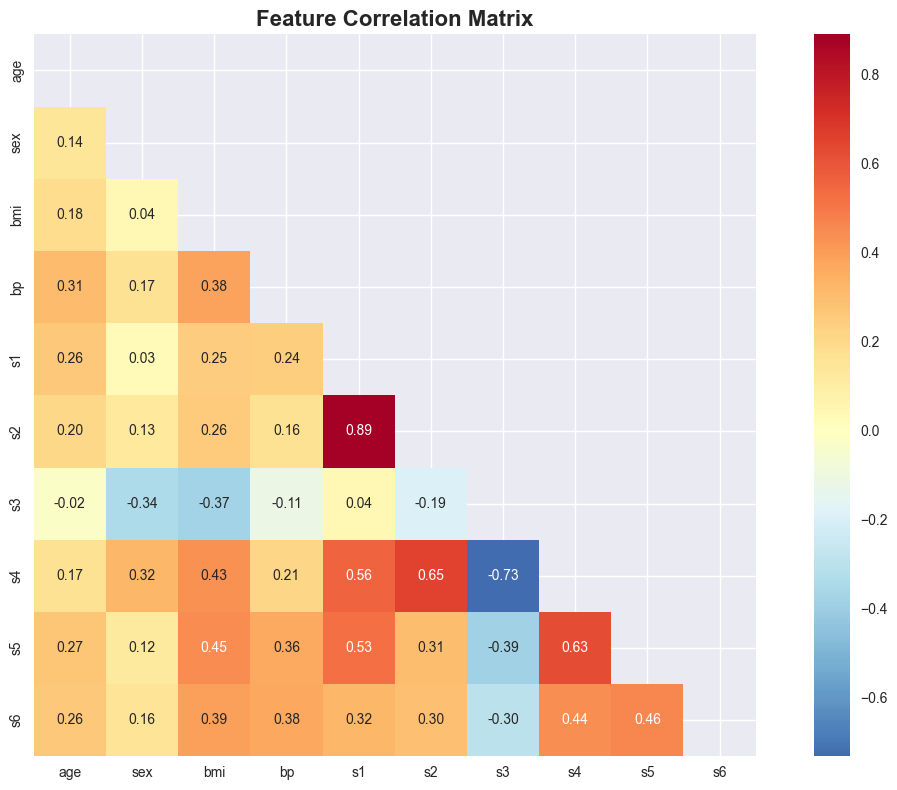

In [80]:
# Correlation analysis
correlation_matrix = X_train.corr()

# Create correlation heatmap
plt.figure(figsize=(12, 8))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(
    correlation_matrix, 
    annot=True, 
    cmap='RdYlBu_r', 
    center=0,
    mask=mask,
    square=True,
    fmt='.2f'
)
plt.title('Feature Correlation Matrix', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

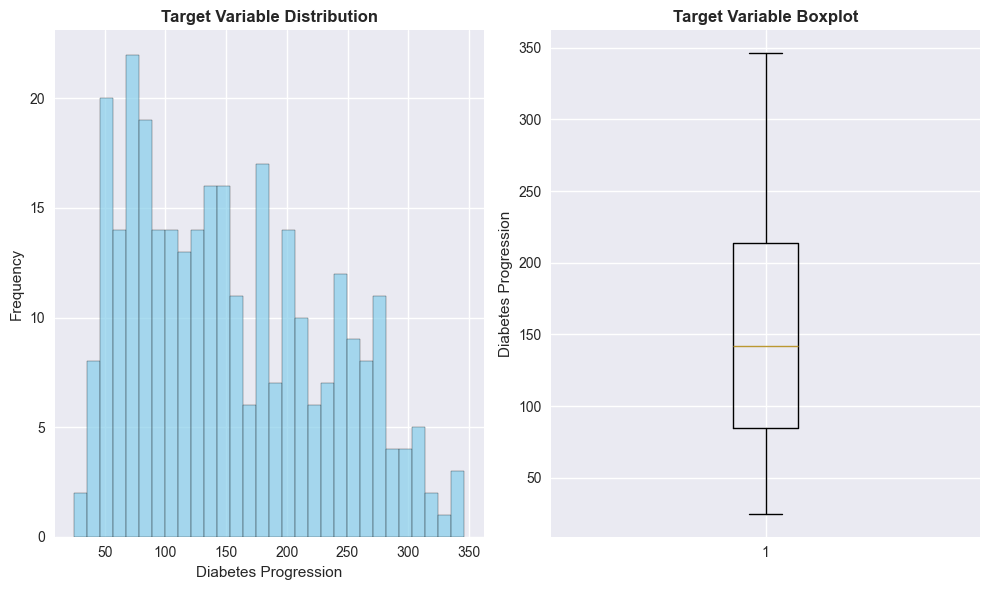

In [81]:
# Distribution of target variable
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.hist(y_train, bins=30, alpha=0.7, color='skyblue', edgecolor='black')
plt.title('Target Variable Distribution', fontweight='bold')
plt.xlabel('Diabetes Progression')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.boxplot(y_train)
plt.title('Target Variable Boxplot', fontweight='bold')
plt.ylabel('Diabetes Progression')

plt.tight_layout()
plt.show()

## Model Development and Hyperparameter Tuning

In [82]:
# Initialize base model
base_regressor = DecisionTreeRegressor(random_state=42)
base_regressor.fit(X_train, y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [83]:
# Baseline performance
baseline_pred = base_regressor.predict(X_test)
baseline_r2 = r2_score(y_test, baseline_pred)
print(f"Baseline Model R² Score: {baseline_r2:.4f}")

Baseline Model R² Score: -0.0555


In [84]:
# Define comprehensive hyperparameter grid
hyperparameter_grid = {
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error'],
    'splitter': ['best', 'random'],
    'max_depth': [1, 2, 3, 4, 5, 6, 8, 10, 12, 15],
    'max_features': ['sqrt', 'log2', None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [85]:
print("Hyperparameter Grid:")
for param, values in hyperparameter_grid.items():
    print(f"  {param}: {values}")


Hyperparameter Grid:
  criterion: ['squared_error', 'friedman_mse', 'absolute_error']
  splitter: ['best', 'random']
  max_depth: [1, 2, 3, 4, 5, 6, 8, 10, 12, 15]
  max_features: ['sqrt', 'log2', None]
  min_samples_split: [2, 5, 10]
  min_samples_leaf: [1, 2, 4]


In [86]:
# Perform grid search with cross-validation
print("Performing Grid Search Cross-Validation...")
print("This may take a few moments...")

grid_search = GridSearchCV(
    estimator=DecisionTreeRegressor(random_state=42),
    param_grid=hyperparameter_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=1
)

Performing Grid Search Cross-Validation...
This may take a few moments...


In [87]:
grid_search.fit(X_train, y_train)

print("Grid Search Complete!")
print(f"Best Cross-Validation Score: {-grid_search.best_score_:.4f}")


Fitting 5 folds for each of 1620 candidates, totalling 8100 fits
Grid Search Complete!
Best Cross-Validation Score: 4004.0187


In [88]:
# Display best parameters
print("Optimal Hyperparameters:")
print("=" * 30)
for param, value in grid_search.best_params_.items():
    print(f"{param}: {value}")

Optimal Hyperparameters:
criterion: squared_error
max_depth: 3
max_features: None
min_samples_leaf: 2
min_samples_split: 2
splitter: best


## Model Evaluation and Performance Metrics

In [89]:
# Make predictions with optimized model
y_pred_optimized = grid_search.predict(X_test)

In [90]:
# Calculate comprehensive metrics
r2_optimized = r2_score(y_test, y_pred_optimized)
mae_optimized = mean_absolute_error(y_test, y_pred_optimized)
mse_optimized = mean_squared_error(y_test, y_pred_optimized)
rmse_optimized = np.sqrt(mse_optimized)

print("Model Performance Metrics:")
print("=" * 30)
print(f"R² Score: {r2_optimized:.4f}")
print(f"Mean Absolute Error: {mae_optimized:.4f}")
print(f"Mean Squared Error: {mse_optimized:.4f}")
print(f"Root Mean Squared Error: {rmse_optimized:.4f}")

Model Performance Metrics:
R² Score: 0.3300
Mean Absolute Error: 46.9576
Mean Squared Error: 3616.7699
Root Mean Squared Error: 60.1396


In [91]:
# Performance comparison
performance_comparison = pd.DataFrame({
    'Metric': ['R² Score', 'MAE', 'MSE', 'RMSE'],
    'Baseline Model': [
        baseline_r2,
        mean_absolute_error(y_test, baseline_pred),
        mean_squared_error(y_test, baseline_pred),
        np.sqrt(mean_squared_error(y_test, baseline_pred))
    ],
    'Optimized Model': [r2_optimized, mae_optimized, mse_optimized, rmse_optimized]
})

print("Performance Comparison:")
print(performance_comparison.round(4))

Performance Comparison:
     Metric  Baseline Model  Optimized Model
0  R² Score         -0.0555           0.3300
1       MAE         60.0150          46.9576
2       MSE       5697.7895        3616.7699
3      RMSE         75.4837          60.1396


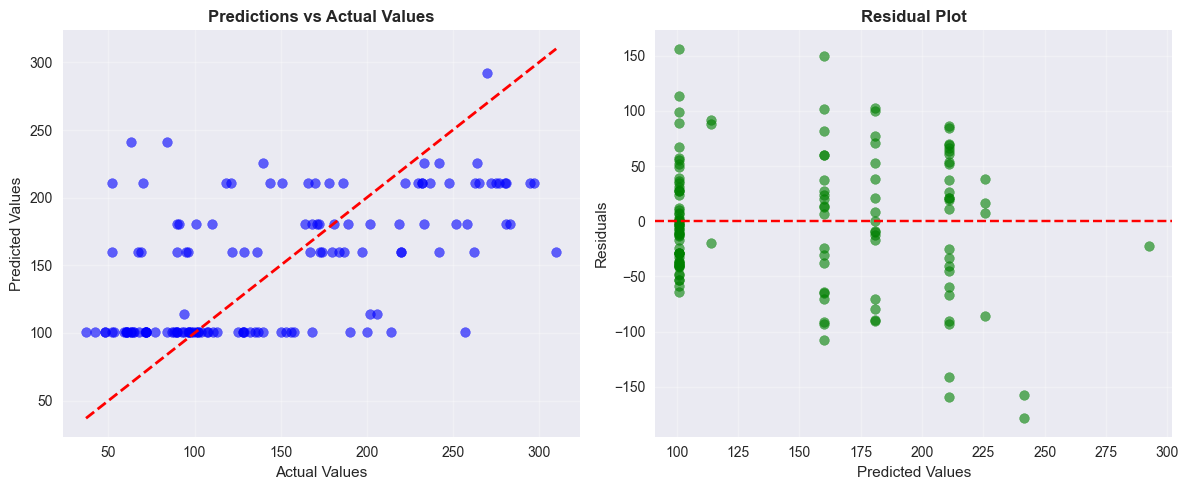

In [92]:
# Prediction vs Actual visualization
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_optimized, alpha=0.6, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predictions vs Actual Values', fontweight='bold')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
residuals = y_test - y_pred_optimized
plt.scatter(y_pred_optimized, residuals, alpha=0.6, color='green')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot', fontweight='bold')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Final Model Training and Visualization

In [93]:
# Train the final model with best parameters
final_model = DecisionTreeRegressor(
    criterion=grid_search.best_params_['criterion'],
    max_depth=grid_search.best_params_['max_depth'],
    max_features=grid_search.best_params_['max_features'],
    splitter=grid_search.best_params_['splitter'],
    min_samples_split=grid_search.best_params_['min_samples_split'],
    min_samples_leaf=grid_search.best_params_['min_samples_leaf'],
    random_state=42
)

final_model.fit(X_train, y_train)

print("Final Model Training Complete!")
print(f"Model Parameters: {final_model.get_params()}")

Final Model Training Complete!
Model Parameters: {'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 2, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': 42, 'splitter': 'best'}


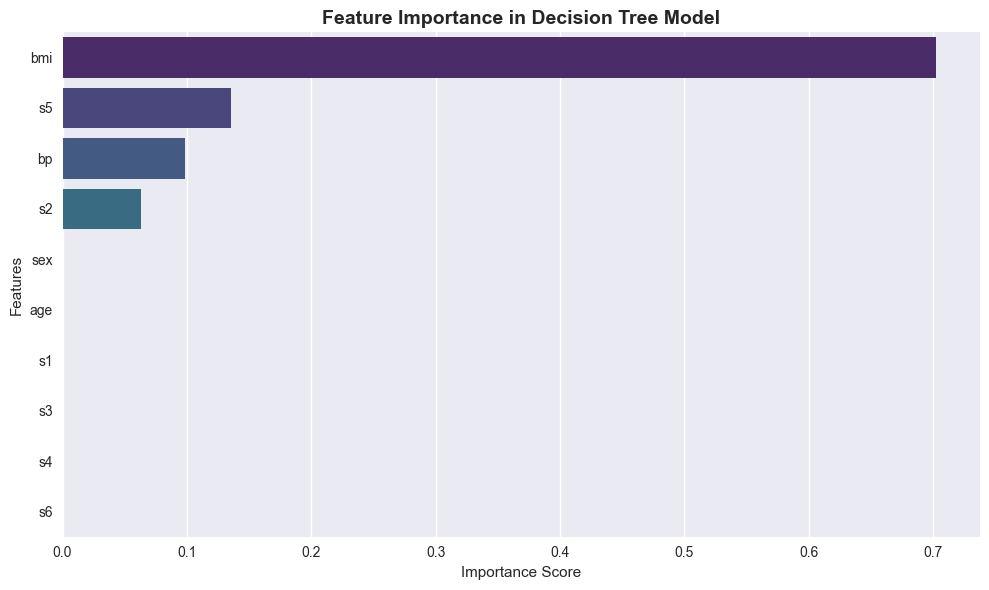

Top 5 Most Important Features:
  feature  importance
2     bmi    0.702667
8      s5    0.135099
3      bp    0.098880
5      s2    0.063353
1     sex    0.000000


In [94]:
# Feature importance analysis
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': final_model.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance, x='importance', y='feature', palette='viridis')
plt.title('Feature Importance in Decision Tree Model', fontsize=14, fontweight='bold')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

print("Top 5 Most Important Features:")
print(feature_importance.head())

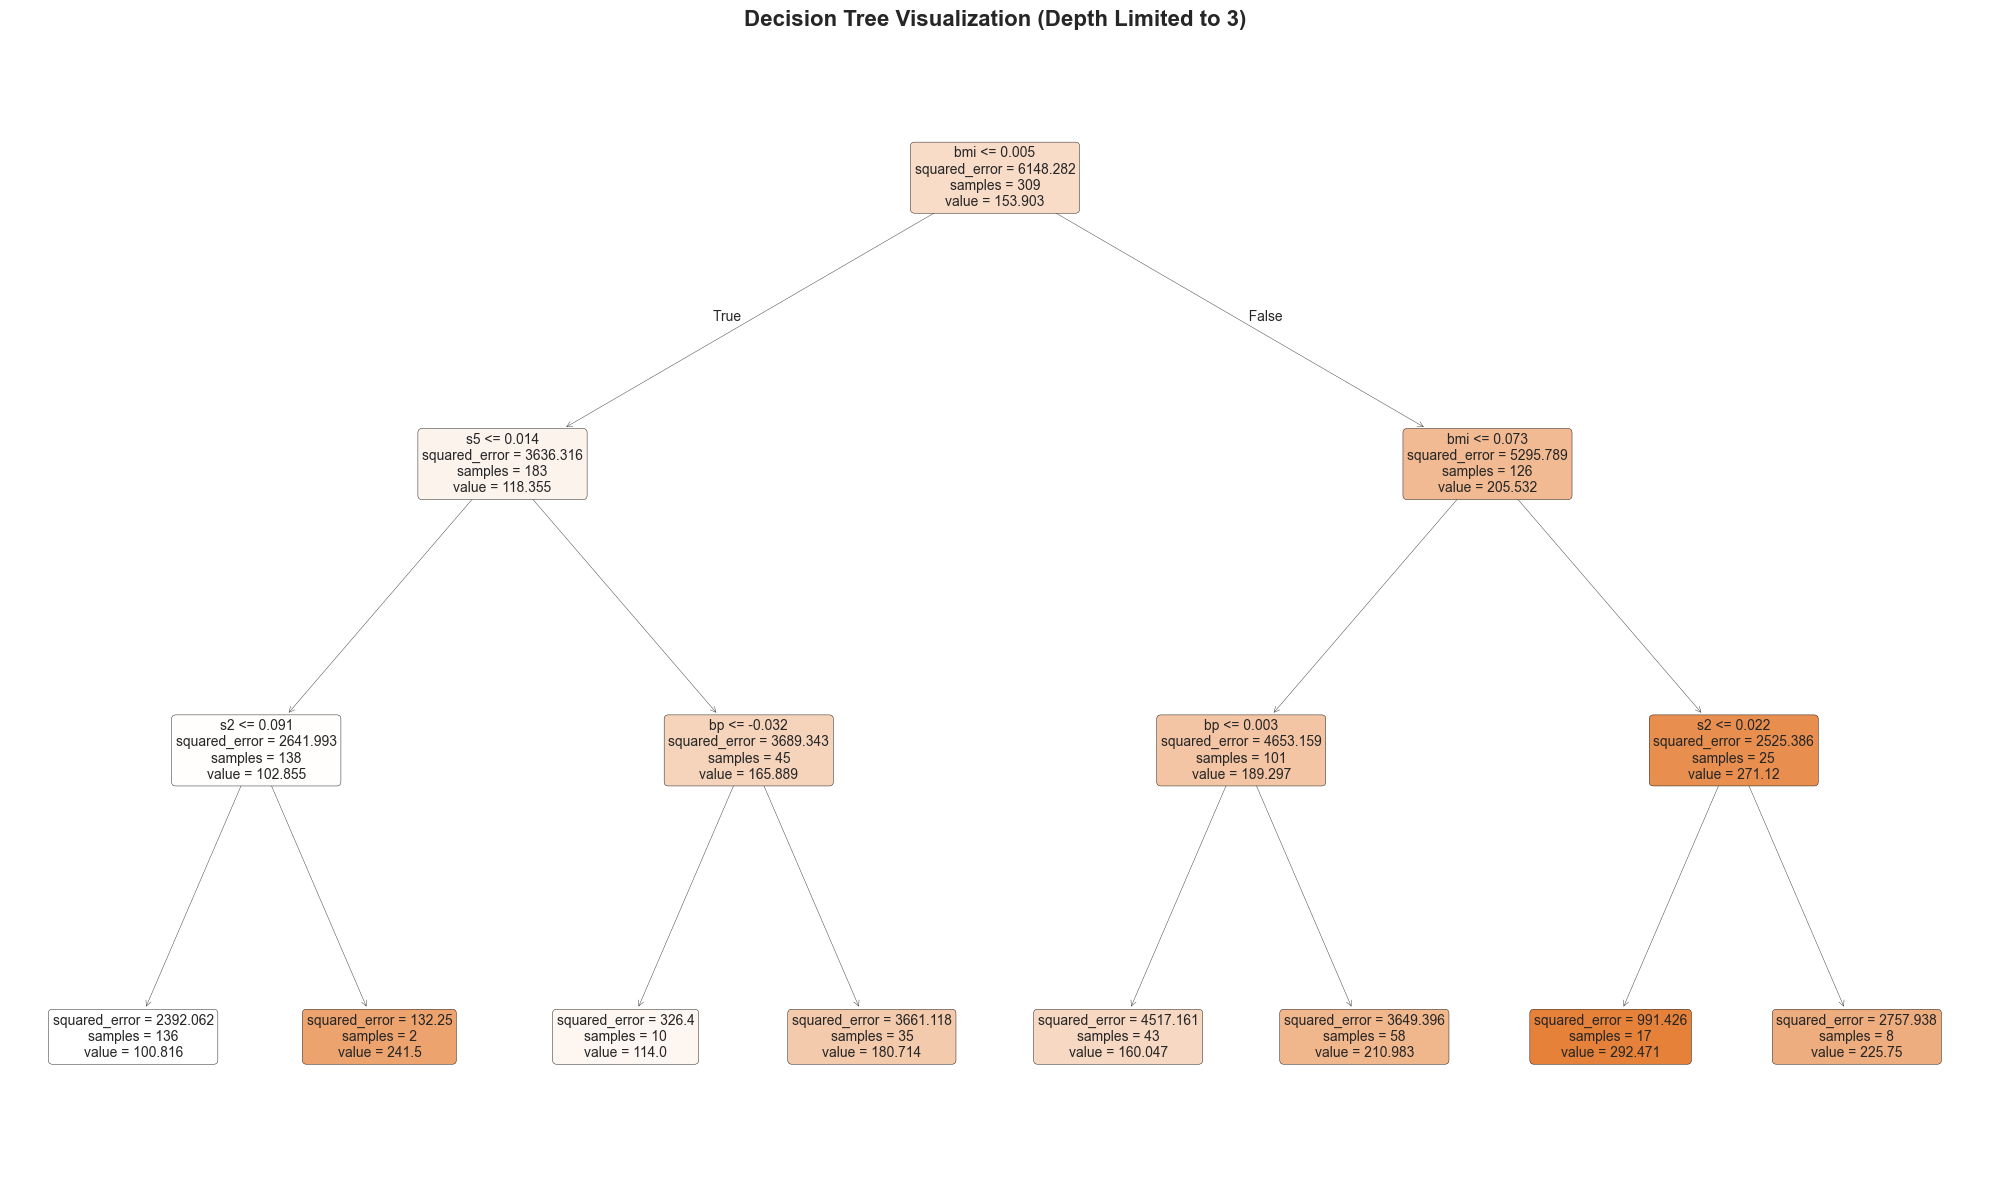

In [95]:
# Visualize the Decision Tree (limited depth for readability)
plt.figure(figsize=(20, 12))
tree.plot_tree(
    final_model,
    filled=True,
    feature_names=X.columns,
    rounded=True,
    fontsize=10,
    max_depth=3  # Limit depth for readability
)
plt.title('Decision Tree Visualization (Depth Limited to 3)', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

In [96]:
# Final performance summary
final_predictions = final_model.predict(X_test)
final_r2 = r2_score(y_test, final_predictions)
final_mae = mean_absolute_error(y_test, final_predictions)
final_rmse = np.sqrt(mean_squared_error(y_test, final_predictions))

print("FINAL MODEL PERFORMANCE SUMMARY")
print("=" * 40)
print(f"R² Score: {final_r2:.4f} ({final_r2*100:.2f}% variance explained)")
print(f"Mean Absolute Error: {final_mae:.4f}")
print(f"Root Mean Squared Error: {final_rmse:.4f}")
print("\nModel Interpretation:")
print(f"- The model explains {final_r2*100:.1f}% of the variance in diabetes progression")
print(f"- On average, predictions are off by {final_mae:.1f} units")
print(f"- Most important features: {', '.join(feature_importance.head(3)['feature'].tolist())}")


FINAL MODEL PERFORMANCE SUMMARY
R² Score: 0.3300 (33.00% variance explained)
Mean Absolute Error: 46.9576
Root Mean Squared Error: 60.1396

Model Interpretation:
- The model explains 33.0% of the variance in diabetes progression
- On average, predictions are off by 47.0 units
- Most important features: bmi, s5, bp


In [97]:
# Create a function for making new predictions
def predict_diabetes_progression(age, sex, bmi, bp, s1, s2, s3, s4, s5, s6):
    """
    Predict diabetes progression for new patient data.
    
    Parameters:
    All parameters should be standardized values as per the dataset format.
    
    Returns:
    Predicted diabetes progression score
    """
    new_data = np.array([[age, sex, bmi, bp, s1, s2, s3, s4, s5, s6]])
    prediction = final_model.predict(new_data)
    return prediction[0]

result = predict_diabetes_progression(
    age=0.038076, sex=0.050680, bmi=0.061696, bp=0.021872,
    s1=-0.044223, s2=-0.034821, s3=-0.043401, s4=-0.002592,
    s5=0.019907, s6=-0.017646
)

print(f"Predicted Diabetes Progression: {result:.2f}")


Predicted Diabetes Progression: 210.98
